In [1]:
import pandas as pd
import ast

from datasets import load_dataset
import matplotlib.pyplot as plt
datasets=load_dataset('lukebarousse/data_jobs')
df=datasets['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list)
                                        if pd.notna(skill_list) else skill_list
                                        )



c:\Users\shabi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_da_us=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()
df_da_us=df_da_us.dropna(subset=['salary_year_avg'])

In [13]:
df_da_us=df_da_us.explode('job_skills')
df_da_us[['salary_year_avg','job_skills']]
df_da_us_group=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [14]:
df_da_us_group.head()

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00


In [38]:
df_da_top_pay=df_da_us_group.sort_values(by='median',ascending=False).head(10)
df_da_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [37]:
df_da_skills=df_da_us_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_da_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


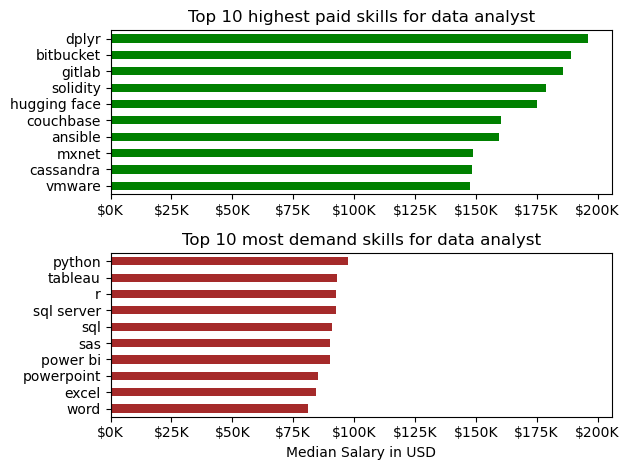

In [47]:
fig,ax=plt.subplots(2,1)
df_da_top_pay.plot(kind='barh',y='median',ax=ax[0],color='green',legend=False)
ax[0].set_title('Top 10 highest paid skills for data analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
df_da_skills[::-1].plot(kind='barh',y='median',ax=ax[1],color='brown',legend=False)
#slicer used to reverse. to show that we can use it in two ways
ax[1].set_title('Top 10 most demand skills for data analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary in USD')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
fig.tight_layout()